# Scikit-Learn
https://scikit-learn.org   

Module implémentant la plupart des algorithmes d'apprentissage statistique supervisé ou non supervisé, excepté le deep-learning.  
Plus un ensemble d'utilitaires pour faire des modèles :  
- preparation des données (ex.> normalisation)
- validation croisée (cross validation)  
- évaluation des modèles
- et bien plus...

## Un exemple de classification binaire avec un jeu de données synthétique

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

#### Créons un jeu de données synthétiques
50 exemples de dimension 2 et appartenant à deux classes 0 et 1

In [2]:
from sklearn.datasets.samples_generator import make_blobs

In [95]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=4, cluster_std=(1, 1))

In [96]:
X.shape

(100, 2)

In [97]:
# 10 exemples 
X[:10]

array([[11.563957  ,  1.3389402 ],
       [10.06721983,  4.08616331],
       [ 8.77253877,  2.33030515],
       [10.12748869,  5.32277484],
       [ 9.06439343,  1.74115688],
       [ 7.88506245,  1.50083021],
       [ 9.38860303, -1.41342865],
       [ 9.67284681, -0.20283165],
       [11.42846765,  1.85948594],
       [ 8.24628674,  3.12802959]])

In [98]:
# leurs classes respectives
print(y[:10])

[0 1 1 1 0 0 0 0 0 1]


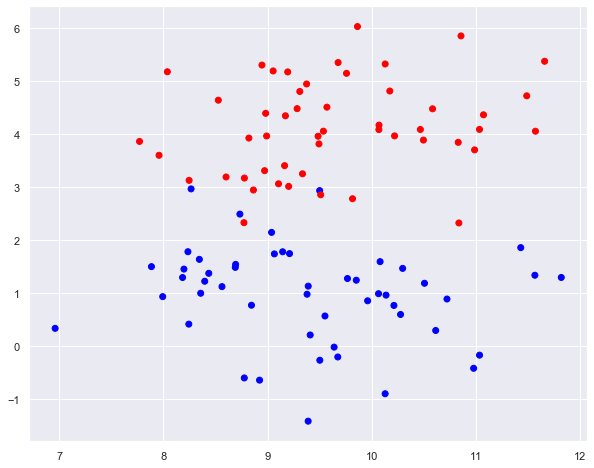

In [99]:
fig = plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')

#### Apprentissage d'un classifieur binaire
On choisi une SVM

In [100]:
# import de la famille de modèle
from sklearn.svm import SVC 

In [101]:
# on définit une instance du modèle avec des paramètres
clf1 = SVC(kernel='linear')

In [102]:
# on entraîne le modèle (apprentissage)
clf1.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [103]:
# On peut prédire sur de nouvelles données
print(clf1.predict( [(2.5, 5)] ))
print(clf1.predict( [(0.5, 0)] ))

[1]
[0]


In [104]:
def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([[xi, yj]])  # quirk about 1d arrays...
    return ax.contour(X, Y, P, colors='k',
                      levels=[-1, 0, 1], alpha=0.5,
                      linestyles=['--', '-', '--'])

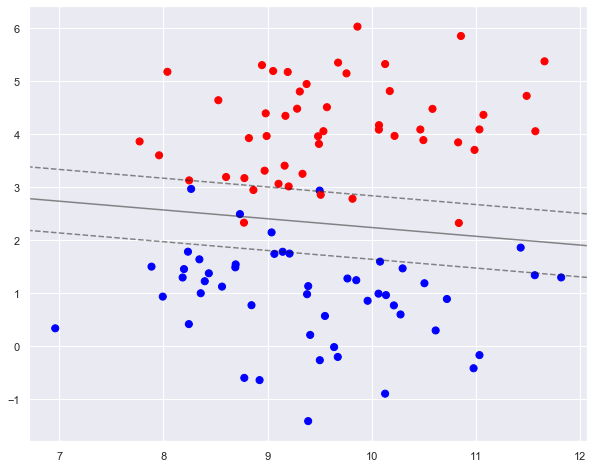

In [105]:
fig = plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')
plot_svc_decision_function(clf1);

Mais pour faire un bon modèle il trouver les hyper-paramètres optimaux, et pouvoir comparer les performances de plusieurs types de modèles.  

- diviser le jeu de données training et testing sets (80%-20% ?)   
`sklearn.model_selection.train_test_split`
- normaliser les données   
`sklearn.preprocessing.normalize`
- Entraîner sur les données d'entraînement en faisant de la validation croisée pour estimer les meilleurs hyper-paramètres   
`sklearn.model_selection.cross_validate`
- évaluation sur le test set  
`sklearn.metrics`